# Goal
Import data and conduct a basic exploritory analysis to see if we can find any questions we can solve.

In [2]:
# Import pertinent libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

# Data Information
```
Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
```

By looking into this data set we can see a few things:
- Dependent variable is Quality
- Independent variables is everything else

Type: **Supervised Learning**

In [154]:
# Import data
red_file = 'winequality-red.csv'
white_file = 'winequality-white.csv'
df_red = pd.read_csv('../_data/Wine/' + red_file, sep=';')
df_white = pd.read_csv('../_data/Wine/' + white_file, sep=';')

# Peek red into data
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [155]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [87]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

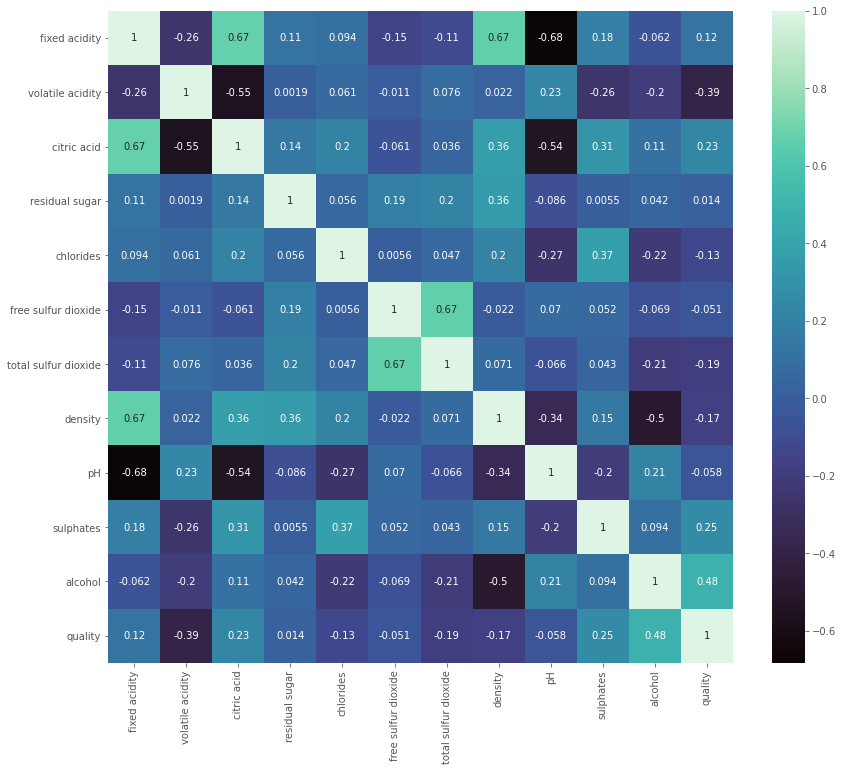

In [88]:
# Check to see if there are highly correlated features to remove
plt.figure(figsize=(14,12))
sns.heatmap(df_red.corr(), cmap='mako', annot=True)

<Figure size 1008x864 with 0 Axes>

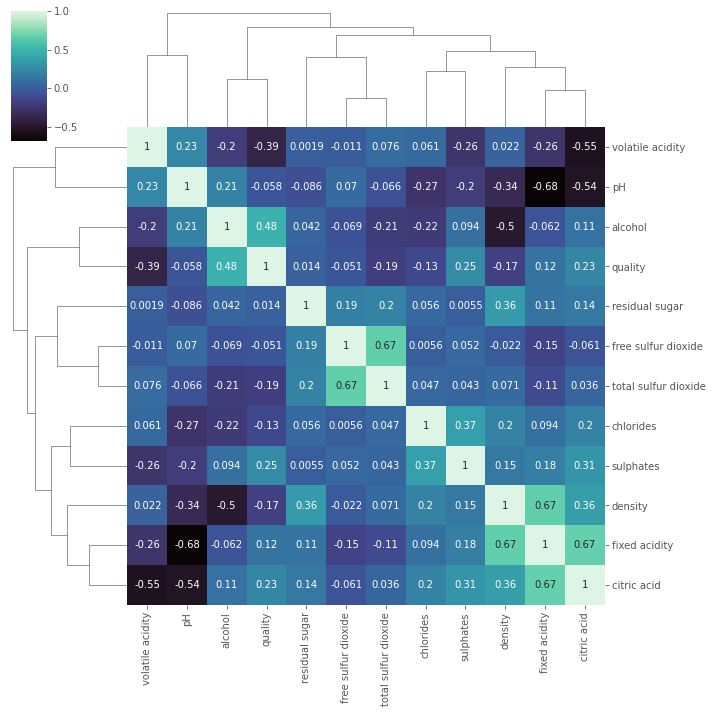

In [89]:
plt.figure(figsize=(14,12))
sns.clustermap(df_red.corr(), cmap='mako', annot=True)

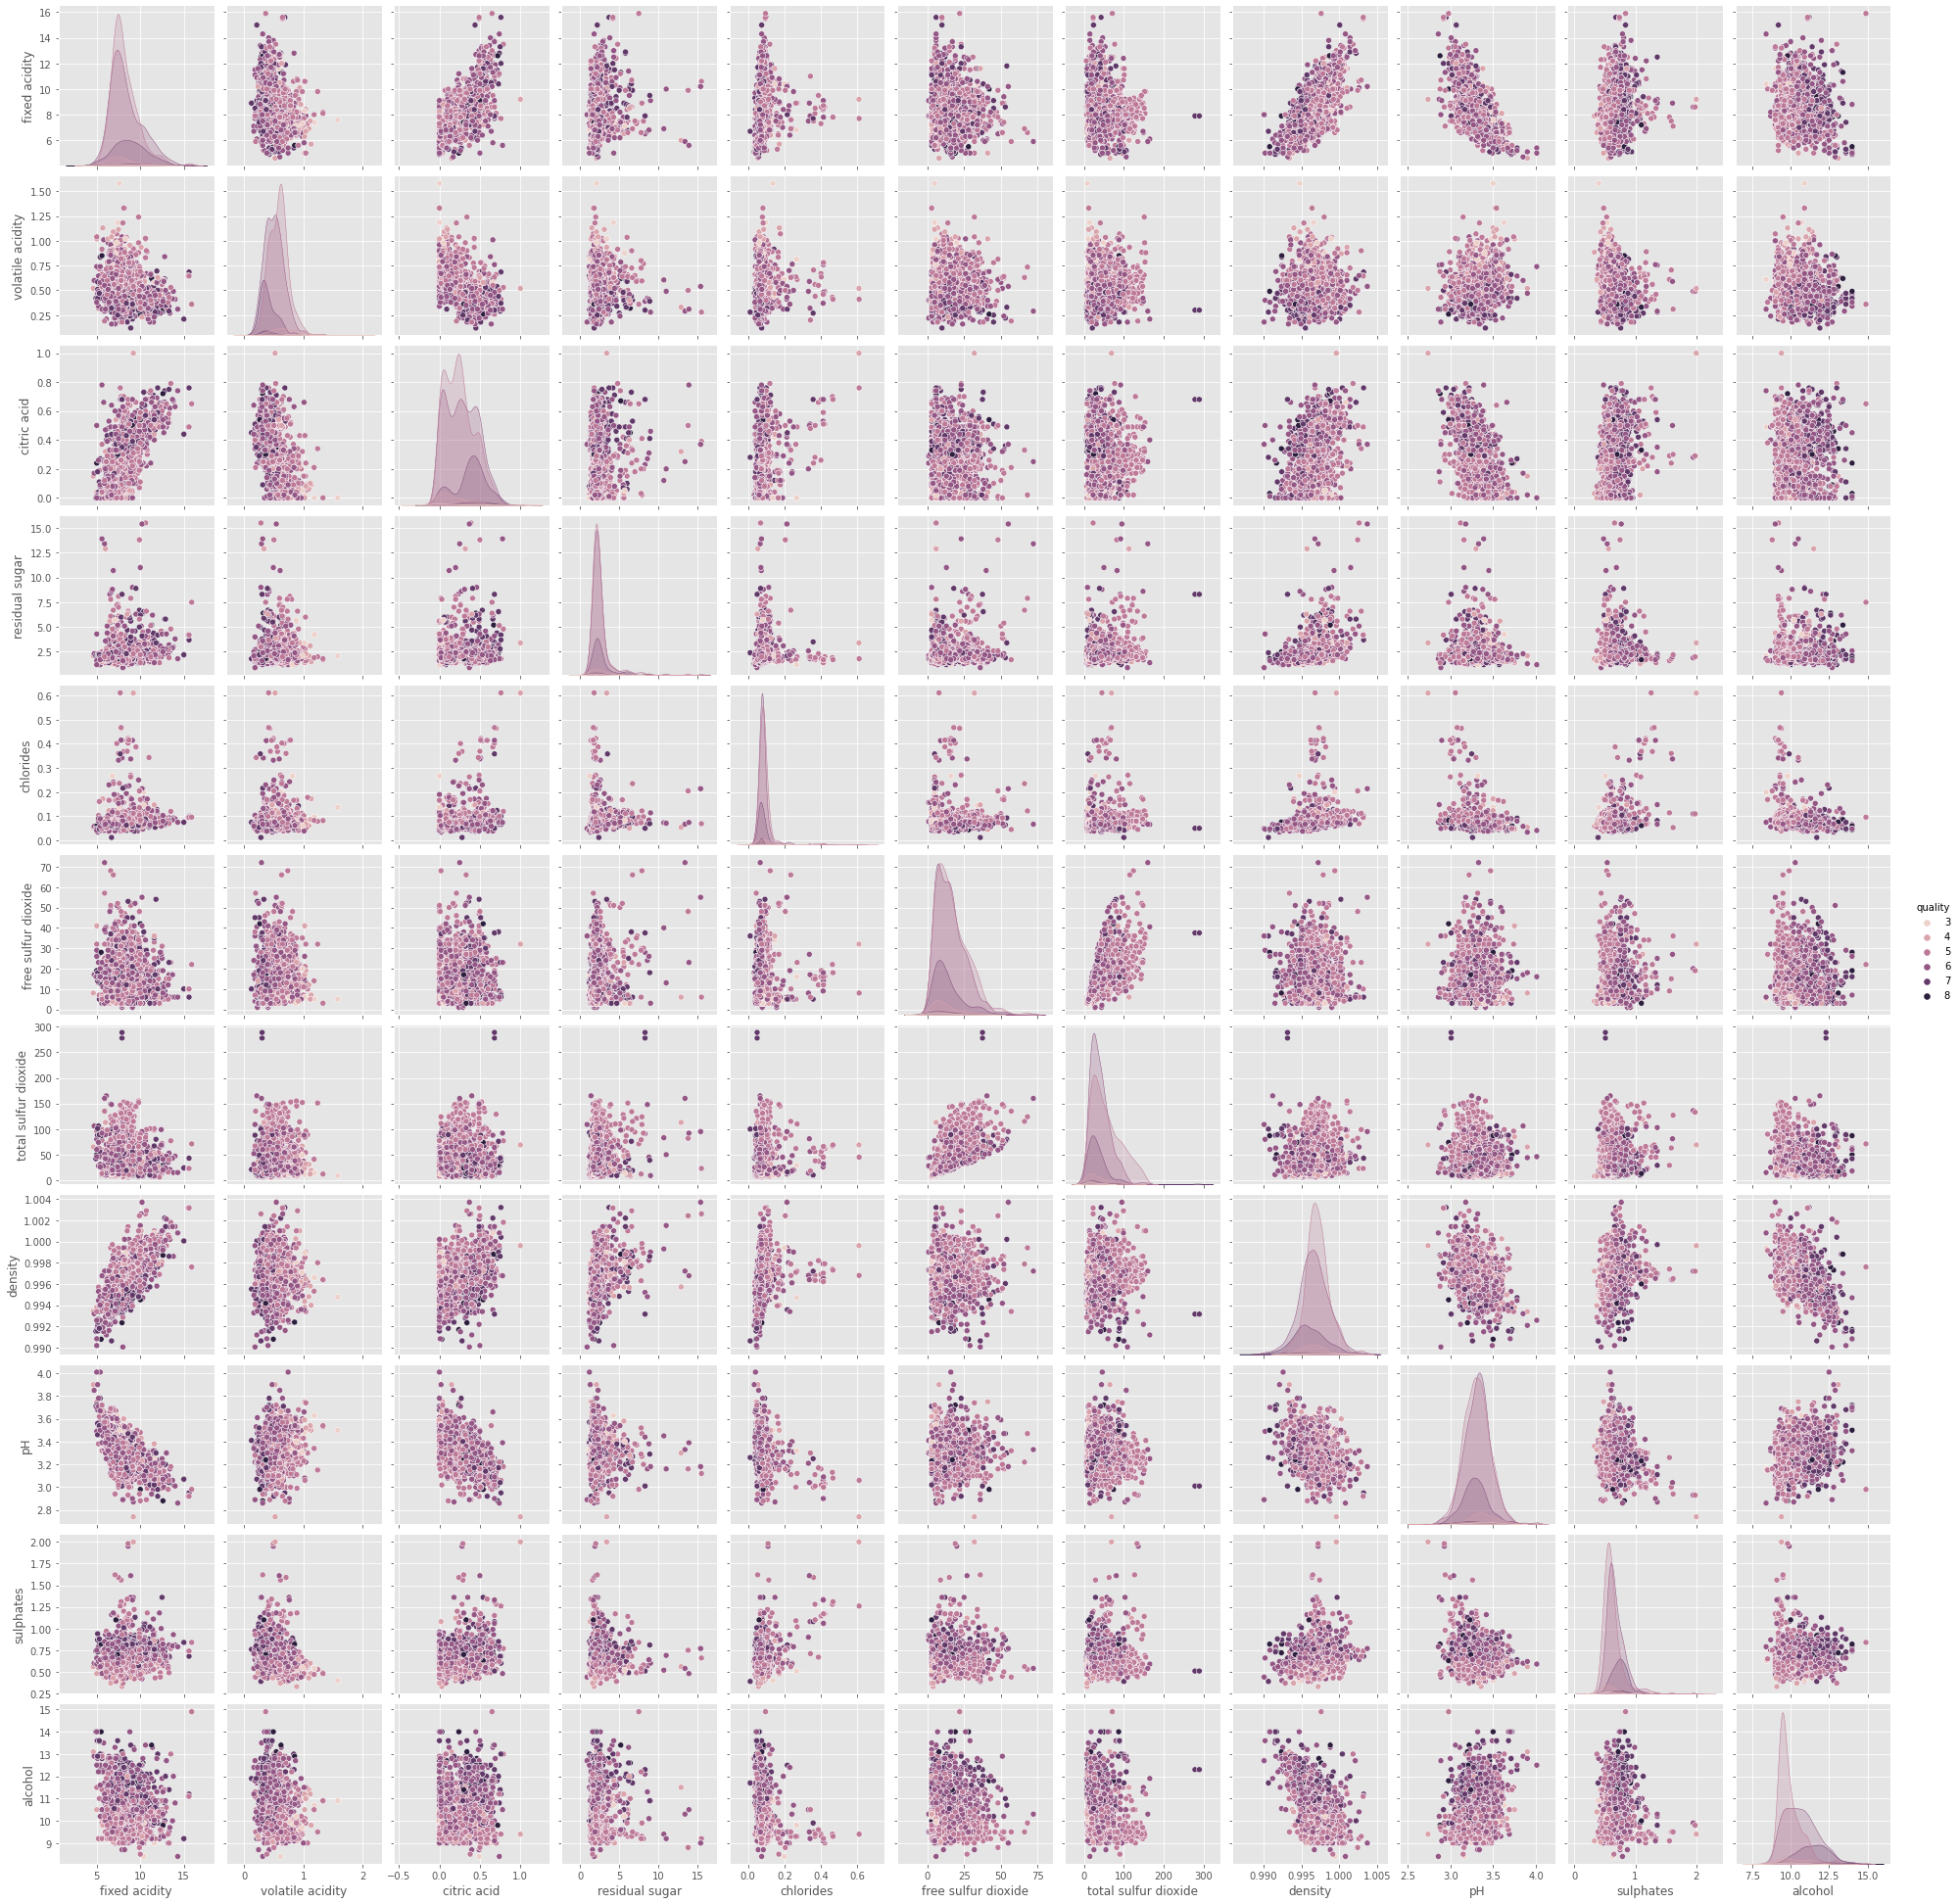

In [90]:
sns.pairplot(df_red, hue= 'quality')

In [157]:
df_red.drop(['density', 'fixed acidity', 'total sulfur dioxide', 'free sulfur dioxide'], axis=1, inplace=True)

<AxesSubplot:>

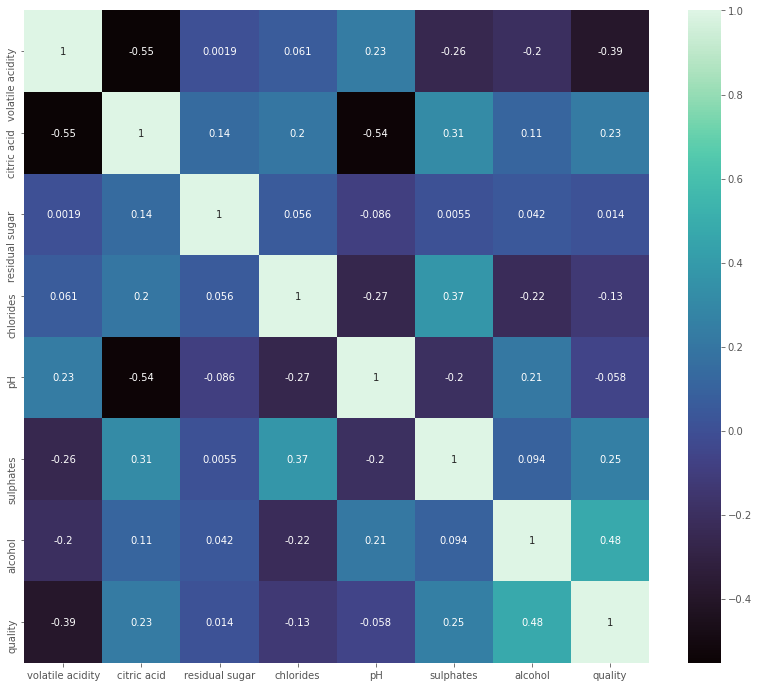

In [158]:
plt.figure(figsize=(14,12))
sns.heatmap(df_red.corr(), cmap='mako', annot=True)

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X = df_red.drop('quality', axis=1)
X = pd.DataFrame(scale.fit_transform(X), columns=X.columns)

y = df_red['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=13)
LR_model = LogisticRegression(max_iter=400)
LR_model.fit(X_train, y_train)
predictions = LR_model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[  0   0   2   0   0   0]
 [  0   0  11   2   0   0]
 [  0   0 154  56   1   0]
 [  0   0  64 112  12   0]
 [  0   0   6  38  15   0]
 [  0   0   0   4   3   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.65      0.73      0.69       211
           6       0.53      0.60      0.56       188
           7       0.48      0.25      0.33        59
           8       0.00      0.00      0.00         7

    accuracy                           0.59       480
   macro avg       0.28      0.26      0.26       480
weighted avg       0.55      0.59      0.56       480



C:\Users\on3mo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\on3mo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\on3mo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [113]:
cm = confusion_matrix(y_test, predictions)

In [149]:
q = list(df_red['quality'].unique())
q.sort()

Text(33.0, 0.5, 'Truths')

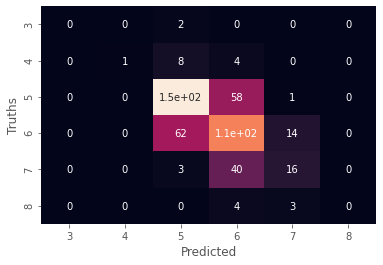

In [142]:
sns.heatmap(confusion_matrix(y_test, predictions), cbar=False, annot=True, xticklabels=q, yticklabels=q)
plt.xlabel('Predicted')
plt.ylabel('Truths')

In [ ]:
# Needs improvement